In [1]:
import pandas as df
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift

In [2]:
# All Data is based on Official released by WHO gathered by Johns Hopkins
coronaData = df.read_csv("corona.csv")

In [3]:
# The point of this analysis is to take a stats approach to the Coronavirus
coronaData

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,...,80239.0,81109.0,82294.0,83652.0,85403.0,87137.0,88948.0,90870.0,93091.0,95324.0
1,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,77780.0,78191.0,78630.0,78961.0,79394.0,79968.0,80174.0,80304.0,80422.0,80565.0
2,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,...,2459.0,2918.0,3664.0,4691.0,6009.0,7169.0,8774.0,10566.0,12669.0,14759.0
3,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,2666.0,2718.0,2747.0,2791.0,2838.0,2873.0,2915.0,2946.0,2984.0,3015.0
4,Hubei,China,Western Pacific Region,258.0,270.0,375.0,375.0,NaN,NaN,NaN,...,64786.0,65187.0,65596.0,65914.0,66337.0,66907.0,67103.0,67217.0,67332.0,67466.0
5,Guangdong,China,Western Pacific Region,14.0,17.0,26.0,32.0,NaN,NaN,NaN,...,1347.0,1347.0,1347.0,1348.0,1349.0,1349.0,1350.0,1350.0,1350.0,1350.0
6,Henan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,1271.0,1271.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0
7,Zhejiang,China,Western Pacific Region,NaN,5.0,5.0,5.0,NaN,NaN,NaN,...,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1206.0,1213.0,1213.0,1215.0
8,Hunan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,1016.0,1016.0,1017.0,1017.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0
9,Anhui,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,989.0,989.0,989.0,990.0,990.0,990.0,990.0,990.0,990.0,990.0


In [5]:
coronaData.0

SyntaxError: invalid syntax (<ipython-input-5-be040a7bbed4>, line 1)

In [4]:
# Taking a look at the confirmed cases over time
globalConfirmed = coronaData['Global Confirmed']
chinaConfirmed = coronaData['China Confirmed']
outsideConfirmed = coronaData['Outside Confirmed']
chinaDeaths = coronaData['China Deaths']

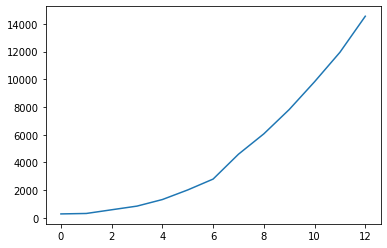

In [5]:
plt.plot(globalConfirmed)
# A line graph of globally confirmed cases over time

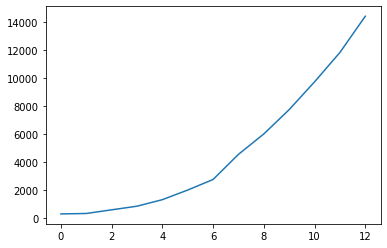

In [6]:
plt.plot(chinaConfirmed)
# A line graph of china confirmed cases over time

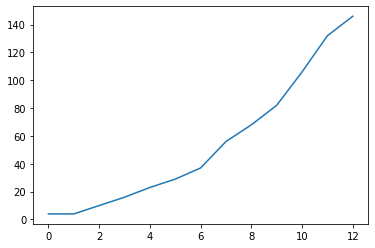

In [7]:
plt.plot(outsideConfirmed)
# A line graph of all other country confirmed cases over time

Mean: 0.01337293196013631
Median: 0.012738853503184714


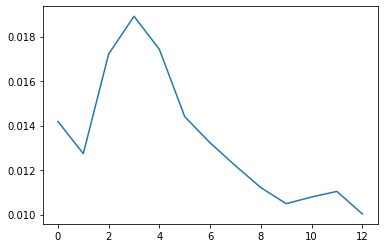

In [8]:
# Taking a look at percentage of percentage of confirmed cases outside of china
percentageNotChina = outsideConfirmed/globalConfirmed
plt.plot(percentageNotChina)
# It appears to be stabilizing at about 1.4 percent 
# We also see that the median and mean lies around this percent
print("Mean: " + str(np.mean(percentageNotChina)))
print("Median: " + str(np.median(percentageNotChina)))

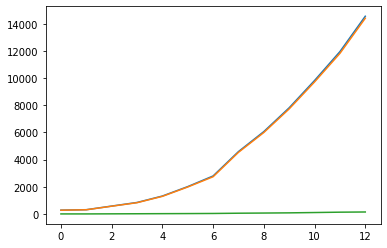

In [9]:
# Let's take a look at all confirmed cases plotted together
plt.plot(globalConfirmed)
plt.plot(chinaConfirmed)
plt.plot(outsideConfirmed)
# We can see that the total count is highly dependent 
# on the total Chinese Confirmed case
# At this stage it appears as though the number of cases increase exponentially

Mean: 0.02306497254616105
Median: 0.021975180972078595


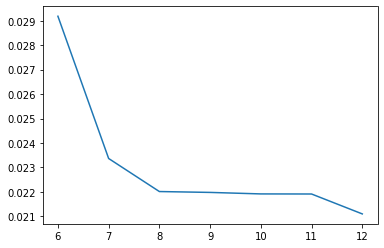

In [10]:
# Now let's take a look at mortality rates
# We only have data on confirmed case vs deaths in China for now
# So let's just use that
# This is total deaths vs confirmed cases
percentageDeath = chinaDeaths/chinaConfirmed
plt.plot(percentageDeath)
# We saw an exponential increase of confirmed caes previously
# We also see that the death per confirmed cases is dropping
# After cleaning up the values we have no data for we see
print("Mean: " + str(np.mean(percentageDeath[~np.isnan(percentageDeath)])))
print("Median: " + str(np.median(percentageDeath[~np.isnan(percentageDeath)])))
# So approximately 2.4% in death/confirmed case

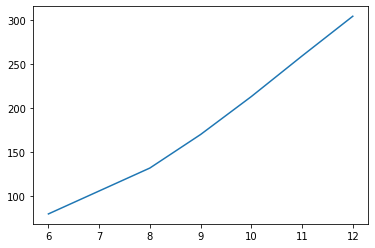

In [11]:
# Let's look at deaths in particular
plt.plot(chinaDeaths)
# We see that it scales linearly whereas confirmed cases scale exponential-like

In [12]:
# Let's say that the time doesn't match up 100%
# With out current data, let's shift death to match the earliest cases
shiftedChinaDeaths = chinaDeaths.shift(-6)

Mean: 0.2103452377774452
Median: 0.20481927710843373


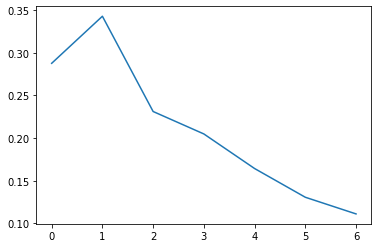

In [13]:
# Now let's evaluate death rates
shiftedDeathRates = shiftedChinaDeaths/chinaConfirmed
plt.plot(shiftedDeathRates)
# We see that the rate is a lot higher, however, very unstable and shouldnt be used
# Especially as it appears to still be dropping as time increases
# There still isn't enough data for accurate calculation
print("Mean: " + str(np.mean(shiftedDeathRates[~np.isnan(shiftedDeathRates)])))
print("Median: " + str(np.median(shiftedDeathRates[~np.isnan(shiftedDeathRates)])))

In [88]:
# And that's the analysis as of January 30th

In [14]:
# Updated Feb 03
# We see that death rates continue to drop